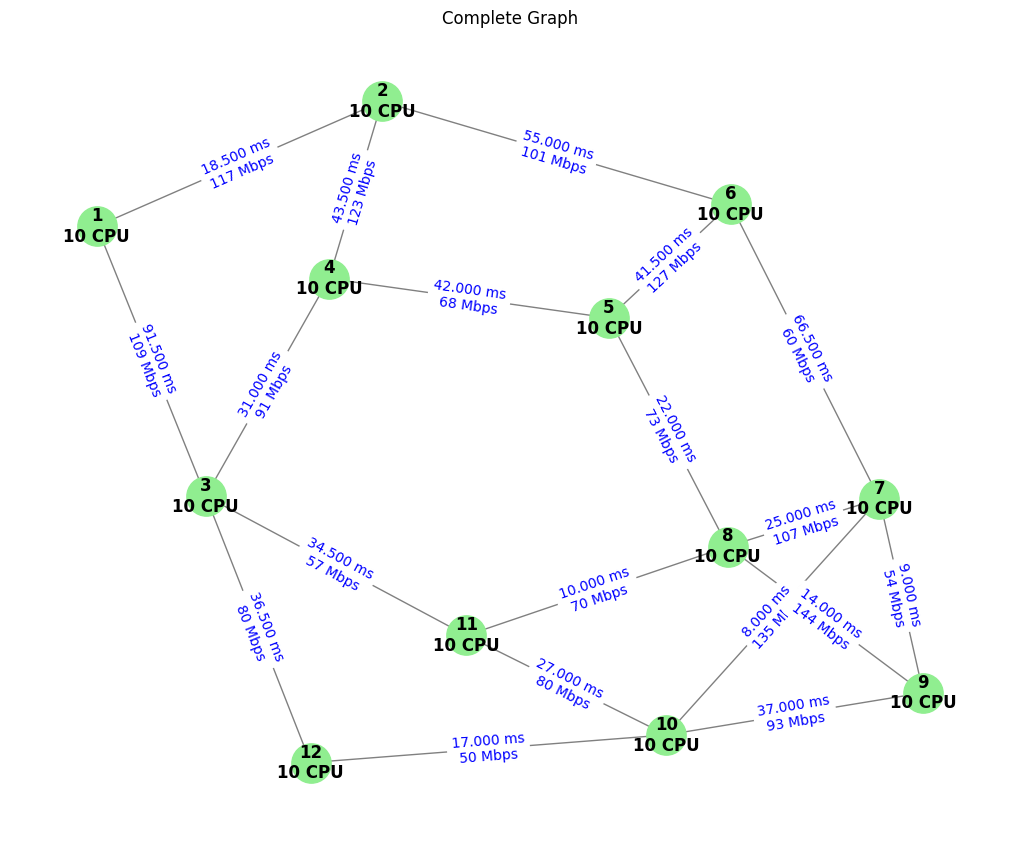

In [1]:
from topology import generate_complete_graph, draw_graph, topologie_finlande

G = topologie_finlande()
draw_graph(G)


In [2]:
from generate_slices import generate_random_slices, vnf_profiles
import pandas as pd


slices = generate_random_slices(G, vnf_profiles, 6)

slices_data = []
for i, (vnfs, vls) in enumerate(slices):
    slices_data.append({
        "Slice": i + 1,
        "VNF IDs": [v["id"] for v in vnfs],
        "VNF CPUs": [v["cpu"] for v in vnfs],
        "VL Pairs": [(vl["from"], vl["to"]) for vl in vls],
        "VL Bandwidths": [vl["bandwidth"] for vl in vls],
        "VL Latencies": [vl["latency"] for vl in vls]
    })

df_slices = pd.DataFrame(slices_data)
df_slices


,Slice,VNF IDs,VNF CPUs,VL Pairs,VL Bandwidths,VL Latencies
0,1,"[vnf0_0, vnf0_1, vnf0_2]","[4, 8, 6]","[(vnf0_0, vnf0_1), (vnf0_1, vnf0_2)]","[150, 175]","[135, 235]"
1,2,"[vnf1_0, vnf1_1, vnf1_2]","[2, 2, 8]","[(vnf1_0, vnf1_1), (vnf1_1, vnf1_2)]","[140, 140]","[182, 227]"
2,3,"[vnf2_0, vnf2_1, vnf2_2]","[8, 6, 8]","[(vnf2_0, vnf2_1), (vnf2_1, vnf2_2)]","[175, 160]","[210, 180]"
3,4,"[vnf3_0, vnf3_1, vnf3_2]","[6, 8, 6]","[(vnf3_0, vnf3_1), (vnf3_1, vnf3_2)]","[160, 175]","[249, 246]"
4,5,"[vnf4_0, vnf4_1, vnf4_2]","[2, 8, 6]","[(vnf4_0, vnf4_1), (vnf4_1, vnf4_2)]","[140, 175]","[152, 214]"
5,6,"[vnf5_0, vnf5_1, vnf5_2]","[4, 6, 6]","[(vnf5_0, vnf5_1), (vnf5_1, vnf5_2)]","[150, 160]","[215, 193]"


In [3]:
node_capacity_base = {node: G.nodes[node]["cpu"] for node in G.nodes}
link_latency = {(u, v): G[u][v]['latency'] for u, v in G.edges}
link_latency.update({(v, u): lat for (u, v), lat in link_latency.items()})
link_capacity_base = {(u, v): G[u][v]['bandwidth'] for u, v in G.edges}
link_capacity_base.update({(v, u): bw for (u, v), bw in link_capacity_base.items()})

In [4]:
from a_star import run_astar

df_astar, results_astar = run_astar(G, slices, node_capacity_base, link_capacity_base)

# 4. Mostra resultado
print(df_astar)

🚀 A* execution started

🔄 Processing Slice 1

🔍 Trying to place vnf0_0 on Node 1
✅ Placed vnf0_0 on Node 1

🔍 Trying to place vnf0_0 on Node 2
✅ Placed vnf0_0 on Node 2

🔍 Trying to place vnf0_0 on Node 3
✅ Placed vnf0_0 on Node 3

🔍 Trying to place vnf0_0 on Node 4
✅ Placed vnf0_0 on Node 4

🔍 Trying to place vnf0_0 on Node 5
✅ Placed vnf0_0 on Node 5

🔍 Trying to place vnf0_0 on Node 6
✅ Placed vnf0_0 on Node 6

🔍 Trying to place vnf0_0 on Node 7
✅ Placed vnf0_0 on Node 7

🔍 Trying to place vnf0_0 on Node 8
✅ Placed vnf0_0 on Node 8

🔍 Trying to place vnf0_0 on Node 9
✅ Placed vnf0_0 on Node 9

🔍 Trying to place vnf0_0 on Node 10
✅ Placed vnf0_0 on Node 10

🔍 Trying to place vnf0_0 on Node 11
✅ Placed vnf0_0 on Node 11

🔍 Trying to place vnf0_0 on Node 12
✅ Placed vnf0_0 on Node 12

🔍 Trying to place vnf0_1 on Node 1
❌ Not enough CPU

🔍 Trying to place vnf0_1 on Node 2
❌ Not enough bandwidth for routing

🔍 Trying to place vnf0_1 on Node 3
❌ Not enough bandwidth for routing

🔍 Trying 